In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option("display.max_columns", 100)
sns.set(style="whitegrid")

# load processed data
df = pd.read_csv("../data/processed/processed_data.csv", low_memory=False)

print("Shape:", df.shape)
df.head()


Shape: (1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender,Country,Province,PostalCode,MainCrestaZone,SubCrestaZone,ItemType,mmcode,VehicleType,RegistrationYear,make,Model,Cylinders,cubiccapacity,kilowatts,bodytype,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,AlarmImmobiliser,TrackingDevice,CapitalOutstanding,NewVehicle,WrittenOff,Rebuilt,Converted,CrossBorder,NumberOfVehiclesInFleet,SumInsured,TermFrequency,CalculatedPremiumPerTerm,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,0.01,Monthly,25.0000,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified,South Africa,Gauteng,1459,Rand East,Rand East,Mobility - Motor,44069150.0,Passenger Vehicle,2004,MERCEDES-BENZ,E 240,6.0,2597.0,130.0,S/D,4.0,6/2002,119300.0,Yes,No,119300,More than 6 months,NaN,NaN,NaN,NaN,NaN,119300.00,Monthly,584.6468,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [6]:
# Data types
df.dtypes

# Missing values
df.isna().sum().sort_values(ascending=False).head(15)

NumberOfVehiclesInFleet    1000098
CrossBorder                 999400
CustomValueEstimate         779642
Rebuilt                     641901
Converted                   641901
WrittenOff                  641901
NewVehicle                  153295
Bank                        145961
AccountType                  40232
Gender                        9536
MaritalStatus                 8259
VehicleType                    552
make                           552
mmcode                         552
Model                          552
dtype: int64

In [7]:
df[["TotalPremium", "TotalClaims"]].describe()

,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01
std,2.302845e+02,2.384075e+03
min,-7.825768e+02,-1.200241e+04
25%,0.000000e+00,0.000000e+00
50%,2.178333e+00,0.000000e+00
75%,2.192982e+01,0.000000e+00
max,6.528260e+04,3.930921e+05


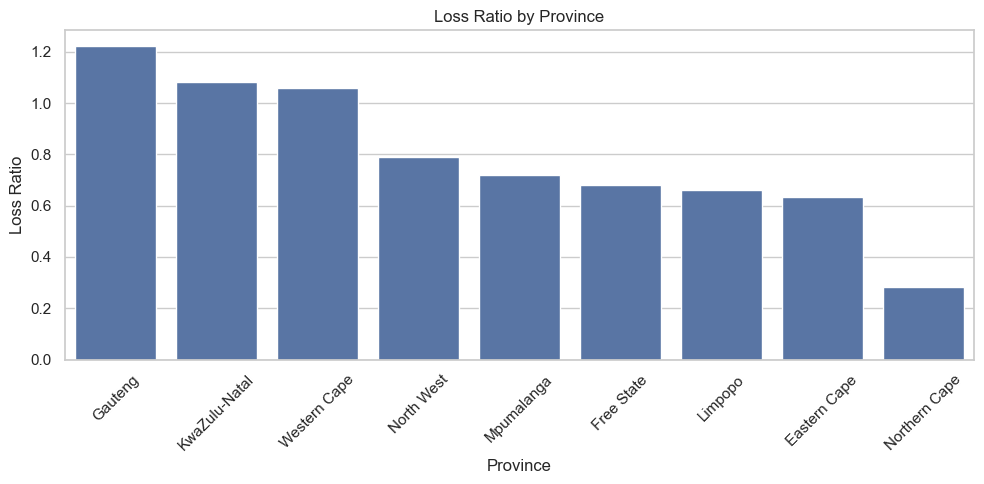

In [8]:
loss_ratio_by_province = (
    df.groupby("Province")[["TotalPremium", "TotalClaims"]]
    .sum()
)

loss_ratio_by_province["LossRatio"] = (
    loss_ratio_by_province["TotalClaims"] / loss_ratio_by_province["TotalPremium"]
)

loss_ratio_by_province = loss_ratio_by_province.sort_values("LossRatio", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(
    x=loss_ratio_by_province.index,
    y=loss_ratio_by_province["LossRatio"]
)
plt.xticks(rotation=45)
plt.title("Loss Ratio by Province")
plt.ylabel("Loss Ratio")
plt.xlabel("Province")
plt.tight_layout()
plt.show()


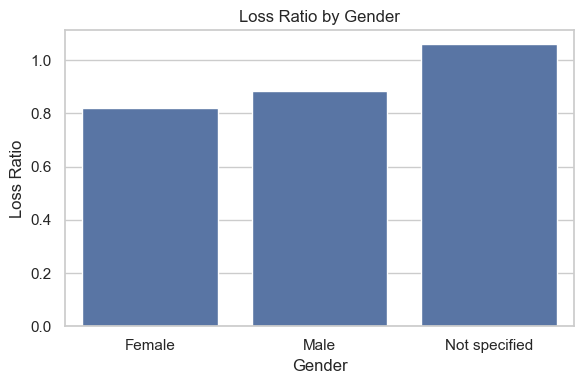

In [9]:
loss_ratio_by_gender = (
    df.groupby("Gender")[["TotalPremium", "TotalClaims"]]
    .sum()
)

loss_ratio_by_gender["LossRatio"] = (
    loss_ratio_by_gender["TotalClaims"] / loss_ratio_by_gender["TotalPremium"]
)

plt.figure(figsize=(6,4))
sns.barplot(
    x=loss_ratio_by_gender.index,
    y=loss_ratio_by_gender["LossRatio"]
)
plt.title("Loss Ratio by Gender")
plt.ylabel("Loss Ratio")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()


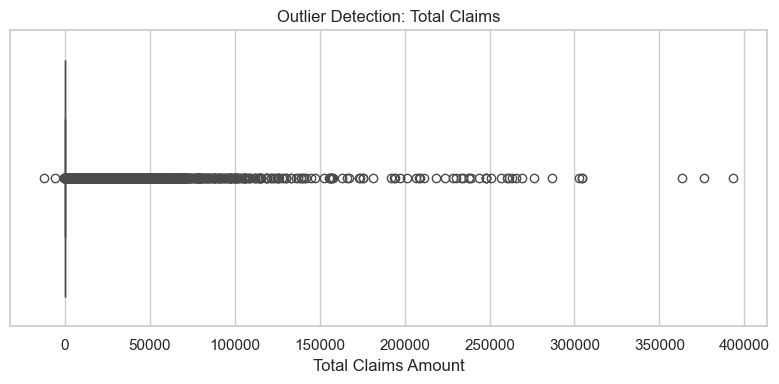

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["TotalClaims"])
plt.title("Outlier Detection: Total Claims")
plt.xlabel("Total Claims Amount")
plt.tight_layout()
plt.show()



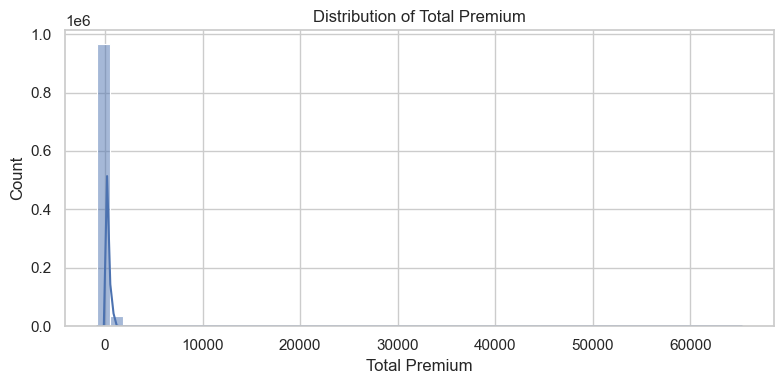

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df["TotalPremium"], bins=50, kde=True)
plt.title("Distribution of Total Premium")
plt.xlabel("Total Premium")
plt.tight_layout()
plt.show()

## Key Insights from Exploratory Data Analysis

### 1. Loss Ratio Across Provinces
The loss ratio varies significantly across provinces, indicating regional differences in insurance risk.
Some provinces consistently exhibit higher loss ratios, suggesting that geographic location is a strong risk driver.
This insight supports the need for region-adjusted pricing strategies.

### 2. Loss Ratio by Gender
The analysis shows observable differences in loss ratios between genders.
While both groups contribute significantly to premiums, one group demonstrates a higher claim-to-premium ratio,
indicating a potential difference in risk exposure.
This finding motivates further statistical testing in Task 3 to determine whether the difference is statistically significant.

### 3. Outliers in Total Claims
The distribution of TotalClaims is highly skewed with extreme outliers.
A small number of policies account for very large claim amounts, which can significantly affect model training.
This confirms the necessity of robust modeling techniques and careful handling of outliers in later stages.
